### ANALYSIS AND CLASSIFICATION OF THE IRIS DATASET USING THE FOLLOWING ALGORITHMS:

- Logistic regression
- KNN classifier
- Decision tree
- Support vector machine (SVM)

In [34]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
# load dataset
df = pd.read_csv("./iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [24]:
# rename 'variety' column for better understanding
df.rename(columns={'variety' : 'species'}, inplace=True)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


##### Basic exploration of loaded dataset
-----------------------------------------


In [25]:
# shape of the dataset (rows & columns)
df.shape

(150, 5)

In [26]:
# summary statistics
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,species
22,4.6,3.6,1.0,0.2,Setosa
133,6.3,2.8,5.1,1.5,Virginica
81,5.5,2.4,3.7,1.0,Versicolor
125,7.2,3.2,6.0,1.8,Virginica
58,6.6,2.9,4.6,1.3,Versicolor


In [30]:
# add new column from product of sepal.length and sepal.width
df["sepal.product"] = df["sepal.length"] * df["sepal.width"]
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species,sepal.product
0,5.1,3.5,1.4,0.2,Setosa,17.85
1,4.9,3.0,1.4,0.2,Setosa,14.70
2,4.7,3.2,1.3,0.2,Setosa,15.04
3,4.6,3.1,1.5,0.2,Setosa,14.26
4,5.0,3.6,1.4,0.2,Setosa,18.00


In [31]:
# What are the unique flower species contained in the dataset
df["species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

<AxesSubplot: xlabel='sepal.length', ylabel='sepal.width'>

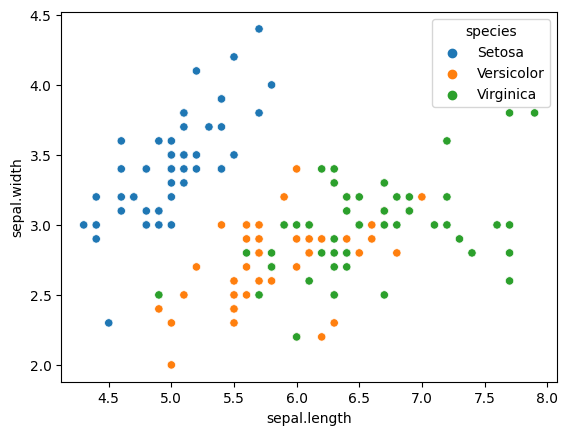

In [33]:
# Observe relationship between sepal length and sepal width of the flowers

sns.scatterplot(x=df["sepal.length"], y=df["sepal.width"], hue=df["species"])

### USING CLASSIFICATION ALGORITHMS FOR DATA MODELLING
--------------------------------------------------

In [54]:
# import more dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score


In [67]:
# select X(independent variable(s)) and Y(dependent variable)
Y = df['species']
X = df.drop(['species', 'sepal.product'], axis=1)

In [68]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
Y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object

In [70]:
# split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

##### Logistic regression model:
-------------------------

To predict flower species based on the sepal length and sepal width columns.

In [71]:
# create and fit a Logistic Regression model on the training dataset
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train.iloc[:, :-2], y_train)


LogisticRegression()

In [73]:
# make predictions on the test dataset
y_pred = logistic_reg_model.predict(X_test.iloc[:, :-2])

In [77]:
# evaluate the model using evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# show evaluation scores
print("Accuracy score: {:.4f}".format(accuracy))
print("Precision socre: {:.4f}".format(precision))
print("Recall score: {:.4f}".format(recall))
print("F1 score: {:.4f}".format(f1))

Accuracy score: 0.8222
Precision socre: 0.8338
Recall score: 0.8222
F1 score: 0.8179


##### K-Nearest Neigbors(KNN) model:
---------------------------------- 

To predict flower species based on all relevant features(columns 0-3)

##### Decision Tree Classifier:
------------------------

To predict flower species based on all relevant features(columns 0-3)